<a href="https://colab.research.google.com/github/TruongQuocTruong/CS114.L22.KHCL/blob/main/COLAB02_PREDICT_THE_RUNNING_TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BÀI TẬP: DỰ ĐOÁN THỜI GIAN CHẠY CỦA CHƯƠNG TRÌNH**

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [2]:
# Lấy và xử lý dữ liệu
data_train = pd.read_csv("https://cs.uit.edu.vn/data2.txt")
data_test1 = pd.read_csv("https://cs.uit.edu.vn/data3.txt")
data_test2 = pd.read_csv("https://cs.uit.edu.vn/data4.txt")

data_train.columns = ['col1','col2']
data_test1.columns = ['col1','col2']
data_test2.columns = ['col1','col2']

#Nguồn tham khảo: https://ichi.pro/vi/huong-dan-nhanh-ve-phan-tich-du-lieu-kham-pha-bang-pandas-164495076968510

No handles with labels found to put in legend.


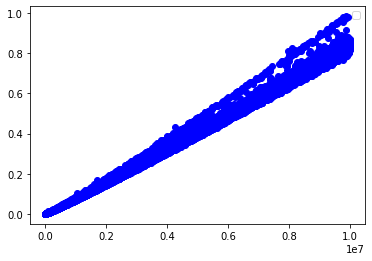

No handles with labels found to put in legend.


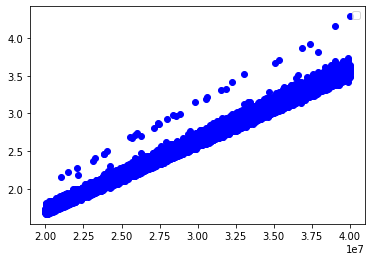

No handles with labels found to put in legend.


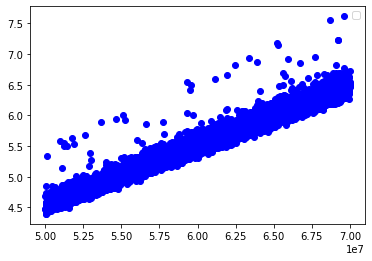

In [5]:
# Mô phỏng dữ liệu, trực quan hoá bằng biểu đồ
from matplotlib import style


plt.scatter(data_train['col1'], data_train['col2'], color = 'b')
plt.legend()
plt.xlabel= 'x axis'
plt.ylabel= 'y axis'
plt.title='Data Regression'
plt.show()

plt.scatter(data_test1['col1'], data_test1['col2'], color = 'b')
plt.legend()
plt.xlabel= 'x axis'
plt.ylabel= 'y axis'
plt.title='Data Regression'
plt.show()

plt.scatter(data_test2['col1'], data_test2['col2'], color = 'b')
plt.legend()
plt.xlabel= 'x axis'
plt.ylabel= 'y axis'
plt.title='Data Regression'
plt.show()

# Nguồn tham khảo: https://ichi.pro/vi/huong-dan-python-matplotlib-tim-hieu-thu-vien-matplotlib-voi-cac-vi-du-23988611301358

In [13]:
# Xử lý dữ liệu
x_train = np.array(data_train['col1']).reshape(-1,1)
y_train = np.array(data_train['col2']).reshape(-1,1)
x_test1 = np.array(data_test1['col1']).reshape(-1,1)
y_test1 = np.array(data_test1['col2']).reshape(-1,1)

In [18]:
# Tạo model dự đoán
# Import các thư viện từ sklearn

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(normalize = True)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test1)
print('Coefficient: ', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test1, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_pred))

Coefficient:  [[8.45569428e-08]]
Mean squared error: 0.02
Coefficient of determination: 0.93


In [21]:
def increase_dimension(x_train):
  x = x_train
  x = np.hstack((x, np.log2(x_train) ) )
  x = np.hstack((x, x_train* np.log2(x_train) ) )
  x = np.hstack((x, x_train*x_train))
  return x

x_train = increase_dimension(x_train)
print(x_train)

#Nguồn: Hướng dẫn của thầy Nguyễn Trường An

[[1.95436700e+06 2.08982700e+01 4.08428892e+07 3.81955037e+12]
 [3.73418500e+06 2.18323620e+01 8.15260786e+07 1.39441376e+13]
 [5.83930100e+06 2.24773642e+01 1.31252096e+08 3.40974362e+13]
 ...
 [9.83736400e+06 2.32298404e+01 2.28520395e+08 9.67737305e+13]
 [9.46659300e+06 2.31744139e+01 2.19382744e+08 8.96163830e+13]
 [4.08080100e+06 2.19604209e+01 8.96161077e+07 1.66529368e+13]]


In [29]:
regr.fit(x_train, y_train)
a = regr.predict(x_train)
print(a - y_train)
print(np.average((a-y_train)**2))

[[-0.00419498]
 [-0.00335483]
 [ 0.01364223]
 ...
 [ 0.02192197]
 [ 0.0141399 ]
 [ 0.00986149]]
0.00012189395532274994
